<a href="https://colab.research.google.com/github/ultraSmartAry/MLCollege/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [ ]:
#Load the data where X is dataset and Y is lable
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Explore The Data

Print the data type of the loaded data sets. This will let us know what type of data we are working with.

In [ ]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Get the shape of the x_train , y_train , x_test and y_test data***You will notice that the shape of the x_train data set is a 4-Dimensional array with 50,000 rows of 32 x 32 pixel image with depth = 3 (RGB) where R is Red, G is Green, and B is Blue. 

The y_train data shape is a 2-Dimensional array with 50,000 rows and 1 column.

 The shape of the x_test data set is a 4-Dimensional array with 10,000 rows of 32 x 32 pixel image with depth = 3 (RGB). 
 
 The y_test data shape is a 2-Dimensional array with 10,000 rows and 1 column.


In [ ]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Take a look at the first image (at index=0) in the training data set as a numpy array**This shows the image as a series of pixel values.

In [ ]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Show the image as an image** instead of a series of pixel values using matplotlib.

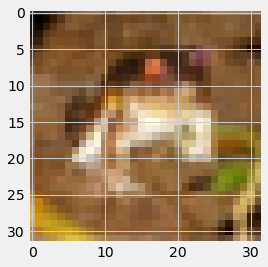

In [ ]:
img = plt.imshow(x_train[index])

**Print the label of the image**. Notice the label printed was the number 6 this corresponds to the frog label.

In [ ]:
print('The image label is: ', y_train[index])


The image label is:  [6]


**Show the label classification** in relation to the number.


In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


**Use One-Hot Encoding to convert the labels into a set of 10 numbers to input into the neural network.** The numbers ofcourse corresponds with the number of labels to classify the images.

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Print all of the new labels in the training data set.

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Print an example of the new labels using the first image in the training data set.

In [ ]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Print all of the new labels in the training data set.

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


**Normalize the pixels in the images to be a value between 0 and 1 ,** they are normally values between 0 and 255, doing this will help the neural network.

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**Build The Convolution Neural Network Model**
To build the model we need to create the architecture using Sequential() .

In [ ]:
model = Sequential()

Next we add the first layer, a convolution layer to extract features from the input image, The first required Conv2D parameter is the number of filters that the convolutional layer will learn.
 
Since this is the first layer we must input the dimension shape which is a 32 x 32 pixel image with depth = 3 (RGB).

In [ ]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

The next layer will be a pooling layer with a 2 x 2 pixel filter to get the max element from the feature maps. This reduces the dimension of the feature maps by half and is also known as sub sampling.

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Create one more convolution layer and pooling layer like before, but without the input_shape.

In [ ]:
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Add a flattening layer, to reduce the image to a linear array also known as a one 1-Dimension vector to feed into and connect with the neural network.

In [ ]:
model.add(Flatten())

**Now create a neural network where the first layer has 1000 neurons and the activation function ReLu.**

In [ ]:
model.add(Dense(1000, activation='relu'))

Add a drop out layer with 50% drop out. Dropout is a technique used to prevent a model from overfitting.and improve your model Accuracy.

In [ ]:
model.add(Dropout(0.5))

**Now create second layer has 500 neurons and the activation function ReLu.**

In [ ]:
model.add(Dense(500, activation='relu'))

Add a drop out layer with 50% drop out.

In [ ]:
model.add(Dropout(0.5))

**Now create third layer has 250 neurons and the activation function ReLu.**

In [ ]:
model.add(Dense(250, activation='relu'))

**Create the last layer of this neural network with 10 neurons (one for each label) using the softmax function.**

In [ ]:
model.add(Dense(10, activation='softmax'))


now check the summary of model.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)             

In [ ]:
print(len(model.layers)) #find how many layers

11


**Compile the model.** Give it the categorical_crossentropy loss function which is used for classes greater than 2, the adam optimizer, and the accuracy of the model.

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

**Train the model using the fit() method,** Fit() is another word for training. We will train the model on the training data with batch size =256, epochs =10, and split the data into training on 80% of the data and using the other 20% as validation. Training may take some time to finish.

Batch: Total number of training examples present in a single batch

Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.


In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 79s 2ms/step - loss: 1.7516 - accuracy: 0.3455 - val_loss: 1.4315 - val_accuracy: 0.4736
Epoch 2/10
40000/40000 [==============================] - 79s 2ms/step - loss: 1.3509 - accuracy: 0.5070 - val_loss: 1.2529 - val_accuracy: 0.5471
Epoch 3/10
40000/40000 [==============================] - 82s 2ms/step - loss: 1.1790 - accuracy: 0.5755 - val_loss: 1.1096 - val_accuracy: 0.5998
Epoch 4/10
40000/40000 [==============================] - 78s 2ms/step - loss: 1.0645 - accuracy: 0.6207 - val_loss: 1.0331 - val_accuracy: 0.6306
Epoch 5/10
40000/40000 [==============================] - 78s 2ms/step - loss: 0.9673 - accuracy: 0.6587 - val_loss: 0.9640 - val_accuracy: 0.6657
Epoch 6/10
40000/40000 [==============================] - 78s 2ms/step - loss: 0.8878 - accuracy: 0.6861 - val_loss: 0.9196 - val_accuracy: 0.6855
Epoch 7/10
40000/40000 [==============================] - 78s 2ms/st

**Get The Models Metrics**

Get the models accuracy on the test data separately.

In [ ]:
model.evaluate(x_test, y_test_one_hot)

10000/10000 [==============================] - 7s 685us/step


[0.8831970622062683, 0.7049999833106995]

Visualize the models accuracy for both the training and validation data.

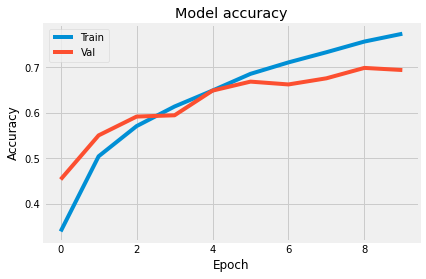

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Visualize the model loss for both the training and validation data.

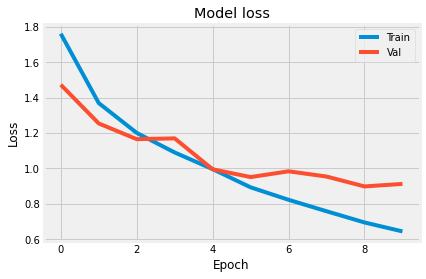

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Test The Model**

Load the data that you want to classify from an image file into the variable new_image.

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab


Saving IMG-20200531-WA0042.jpg to IMG-20200531-WA0042.jpg


In [ ]:
new_image = plt.imread("/content/IMG-20200531-WA0042.jpg")

Show the uploaded image.

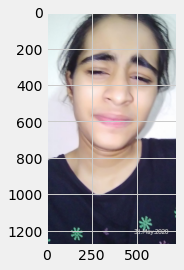

In [ ]:
img = plt.imshow(new_image)

Resize the image to a 32 x 32 pixel image with depth = 3, and show the image.

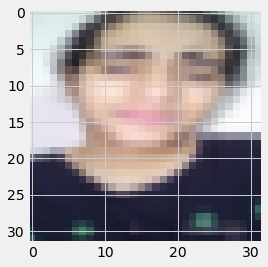

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

Get the predictions for each class and store it into a variable.

In [ ]:
predictions = model.predict(np.array( [resized_image] ))

Show the predictions

In [ ]:
predictions

array([[5.29868470e-04, 1.67877437e-03, 6.63053850e-03, 8.49096298e-01,
        4.67307662e-04, 8.63579735e-02, 1.04653835e-02, 5.91520395e-04,
        4.33694124e-02, 8.12925631e-04]], dtype=float32)

In [ ]:
predictions.argmax()

3

Sort the predictions from least to greatest such that the highest probability is at index=9 and the lowest probability is at index = 0.

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[3, 5, 8, 6, 2, 1, 9, 7, 0, 4]


Print the first 5 most likely classes and the corresponding probability.

In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 84.91 %
dog : 8.64 %
ship : 4.34 %
frog : 1.05 %
bird : 0.66 %
